## **Project: Data Analysis on the dataset of trending videos on Youtube in Canada in year 2018.**

## **Members:**<br>
>### **Tushar Bura  19/19059 <br> Paras Kumar  19/19049**






> ## **Importing and Reading**


In [38]:
# making drive connection
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/DAV_Lab/DAV Project')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

In [42]:
# Reading the dataset

df = pd.read_csv('CAvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [ ]:
# Configuration Options

PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

> ## **Data Cleaning**


In [ ]:
# Description column has some null values, so it requires data cleaning
df[df["description"].apply(lambda x: pd.isna(x))].head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
98,lHcXhBojpeQ,17.14.11,三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！,明星百曉生,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,NaN
115,_QHEPUKBn9g,17.14.11,‘Too Alabama for Alabama’: SNL brutally mocks ...,MAXI POWER,23,2017-11-12T05:01:18.000Z,[none],20163,44,34,8,https://i.ytimg.com/vi/_QHEPUKBn9g/default.jpg,False,False,False,NaN


In [ ]:
# we put an empty string in place of each null value in the description column
df["description"] = df["description"].fillna(value="")
df[df.index==98]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
98,lHcXhBojpeQ,17.14.11,三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！,明星百曉生,22,2017-11-12T12:49:50.000Z,[none],88061,47,58,17,https://i.ytimg.com/vi/lHcXhBojpeQ/default.jpg,False,False,False,


2018   0.77
2017   0.23
Name: trending_date, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


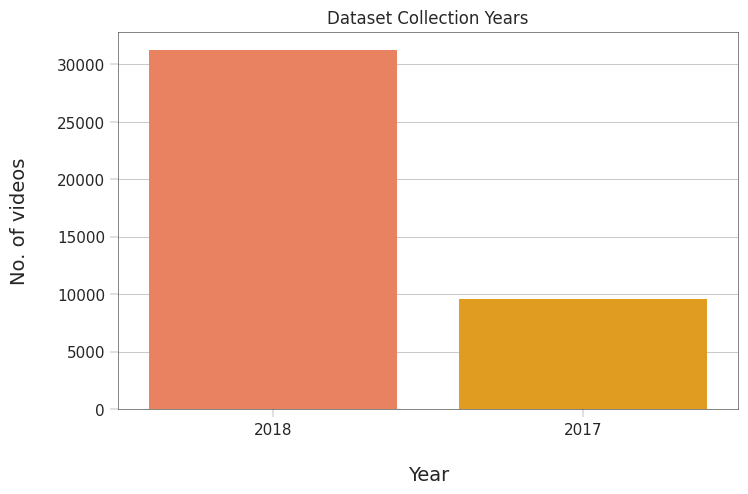

In [ ]:
# Dataset collection years
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

# display(cdf.head())

_, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(title="Dataset Collection Years", xlabel="Year", ylabel="No. of videos")

# sns.barplot(x="year", y="No_of_videos", data=cdf, palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
# ax.set(title="Dataset Collection Years", xlabel="Year", ylabel="No. of videos")


display(df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True))

> ## **Describtion of Numerical Data**





In [ ]:
# Describtion of numerical data
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.00,40881.00,40881.00,40881.00,40881.00
mean,20.80,1147035.91,39582.69,2009.20,5042.97
std,6.78,3390913.02,132689.53,19008.37,21579.02
min,1.00,733.00,0.00,0.00,0.00
25%,20.00,143902.00,2191.00,99.00,417.00
50%,24.00,371204.00,8780.00,303.00,1301.00
75%,24.00,963302.00,28717.00,950.00,3713.00
max,43.00,137843120.00,5053338.00,1602383.00,1114800.00


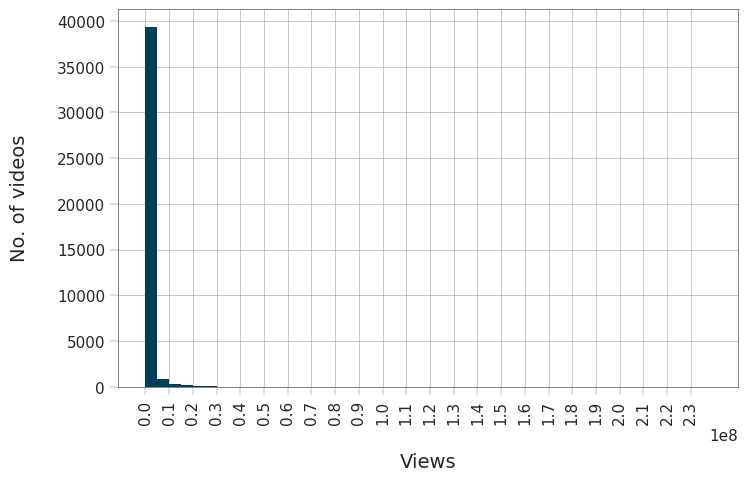

In [ ]:
# VIEWS' HISTOGRAM
# Plotting histogram for the views column: to see how many videos have between 10 million and 20 million views, 
# how many videos have between 20 million and 30 million views, and so on

_, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

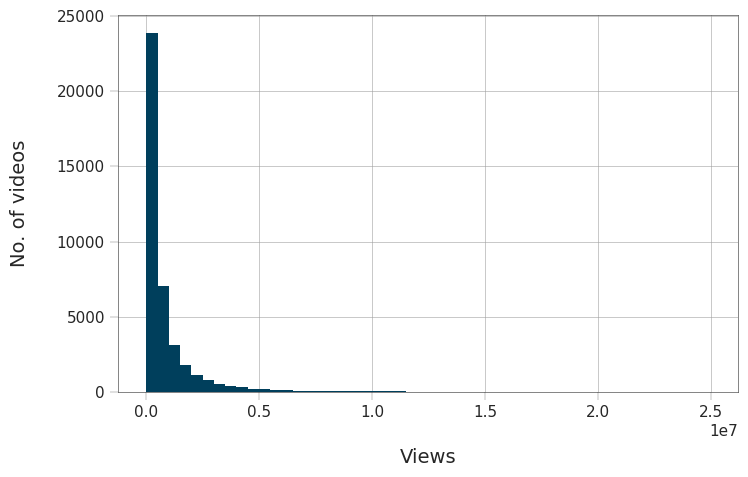

In [ ]:
# Histogram just for videos with 25 million views or less to get a closer look at the distribution of the data.

_, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [ ]:
# Now we see that the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views
print("%age of Videos with less than \n")

print("1M viwes: ", df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100, "%")

# less than 1.5 million views
print("1.5M views: ", df[df['views'] < 1.5e6]['views'].count() / df['views'].count() * 100, "%")

# less than 5 million views
print("5M views: ", df[df['views'] < 5e6]['views'].count() / df['views'].count() * 100, "%")

%age of Videos with less than 

1M viwes:  75.8200631100022 %
1.5M views:  83.52780020058218 %
5M views:  96.18893862674592 %


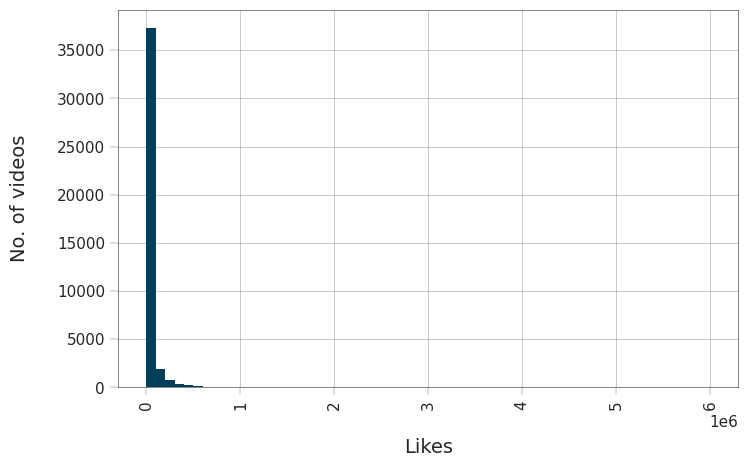

In [ ]:
# LIKES' HISTOGRAM

plt.rc('figure.subplot', wspace=0.9)
_, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

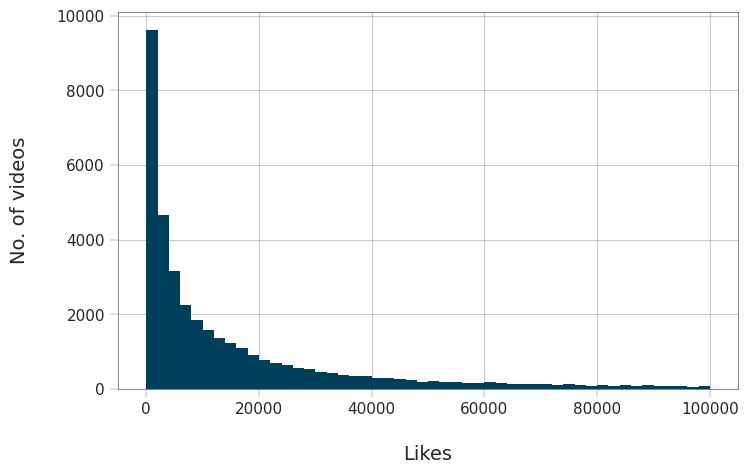

In [ ]:
# the vast majority of trending videos have between 0 and 100,000 likes. 
# So let's plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

_, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [ ]:
# Now we can see that the majority of trending videos have 40,000 likes or less with a peak for videos with 2,000 likes or less.
# Now we see the exact percentage of videos with less than 40,000 likes

print('% of videos with less than 40,000 likes: ', df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100)

# Similarly, we can see the percentage of videos with less than 100,000 likes:
print('% of videos with less than 100,000 likes: ', df[df['likes'] < 1e5]['likes'].count() / df['likes'].count() * 100)

% of videos with less than 40,000 likes:  80.5802206403953
% of videos with less than 100,000 likes:  91.32849000758299


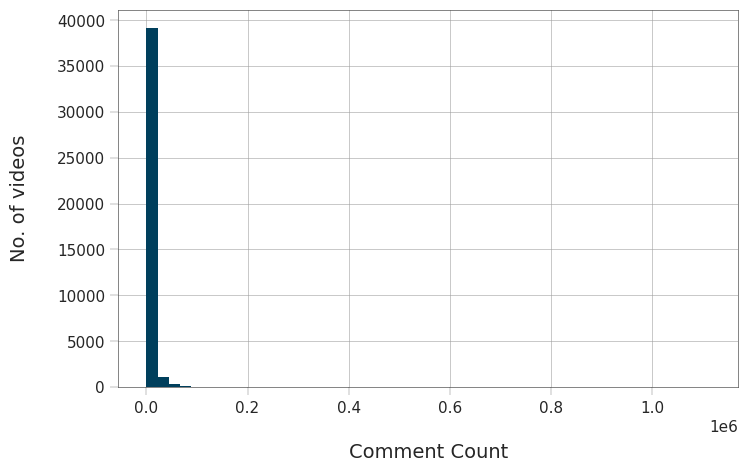

In [ ]:
# COMMENT COUNT HISTOGRAM

_, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

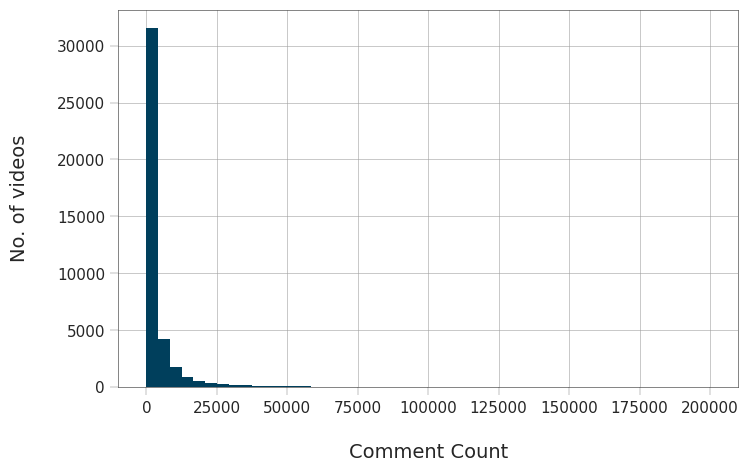

In [ ]:
# Let's get a closer look by eliminating entries with comment count larger than 200,000 comment

_, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

In [ ]:
# We see that most trending videos have around
# 25000/6 ≈ 4166 comments
# since each division in the graph has six histogram bins.

# As with views and likes, let's see the exact percentage of videos with less than 4000 comments
print('% of videos with less than 4,000 comments: ', df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100)

# The exact percentage of videos with less than 25000 comments
print('% of videos with less than 25,000 comments: ', df[df['comment_count'] < 25000]['comment_count'].count() / df['comment_count'].count() * 100)

% of videos with less than 4,000 comments:  76.51720848315844
% of videos with less than 25,000 comments:  96.41153592133264


> ## **Description on Non-Numerical Data**


In [ ]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40881,40881,40881,40881,40881,40881,40881,40881
unique,24427,205,24573,5076,23613,20157,24422,22346
top,UceaB4D0jpo,17.30.11,Most Popular Violin Covers of Popular Songs 20...,SET India,2017-12-20T23:00:00.000Z,[none],https://i.ytimg.com/vi/l_lblj8Cq0o/default.jpg,
freq,8,200,15,192,11,2385,8,1296


False   0.51
True    0.49
Name: contains_capitalized, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


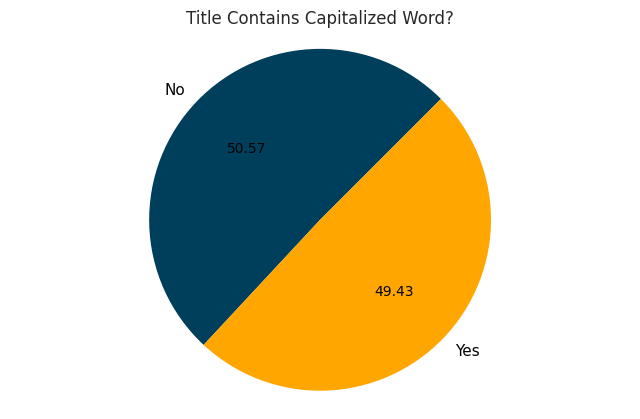

In [ ]:
# How many trending video TITLES CONTAIN CAPITALIZED WORD? (atleast one word)

def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
_, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], autopct='%.2f', 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

df["contains_capitalized"].value_counts(normalize=True)

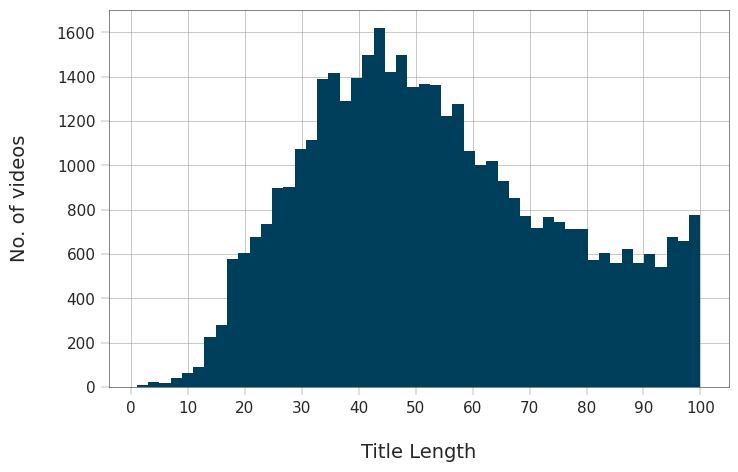

In [ ]:
# VIDEO TITLE LENGTHS

# adding another column
df["title_length"] = df["title"].apply(lambda x: len(x))

_, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

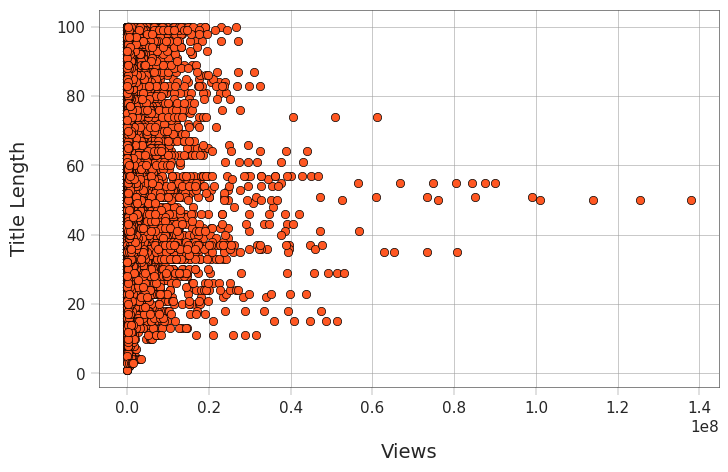

In [ ]:
# We can see that title-length distribution resembles a normal distribution, 
# where most videos have title lengths between 30 and 60 character approximately.
# Now let's draw a scatter plot between title length and number of views to see the relationship between these two variables.

_, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

> ## **Correlation between dataset variables**

In [ ]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.14,-0.14,-0.03,-0.07,0.04,0.02,-0.03,-0.00,-0.05
views,-0.14,1.00,0.83,0.56,0.69,0.00,0.01,0.00,-0.02,-0.01
likes,-0.14,0.83,1.00,0.46,0.84,-0.02,-0.02,0.00,-0.01,-0.09
dislikes,-0.03,0.56,0.46,1.00,0.64,-0.01,-0.01,0.00,-0.02,-0.01
comment_count,-0.07,0.69,0.84,0.64,1.00,-0.03,-0.02,0.00,0.01,-0.06
comments_disabled,0.04,0.00,-0.02,-0.01,-0.03,1.00,0.15,-0.00,-0.03,0.03
ratings_disabled,0.02,0.01,-0.02,-0.01,-0.02,0.15,1.00,-0.00,-0.00,0.00
video_error_or_removed,-0.03,0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,-0.02,-0.03
contains_capitalized,-0.00,-0.02,-0.01,-0.02,0.01,-0.03,-0.00,-0.02,1.00,0.15
title_length,-0.05,-0.01,-0.09,-0.01,-0.06,0.03,0.00,-0.03,0.15,1.00


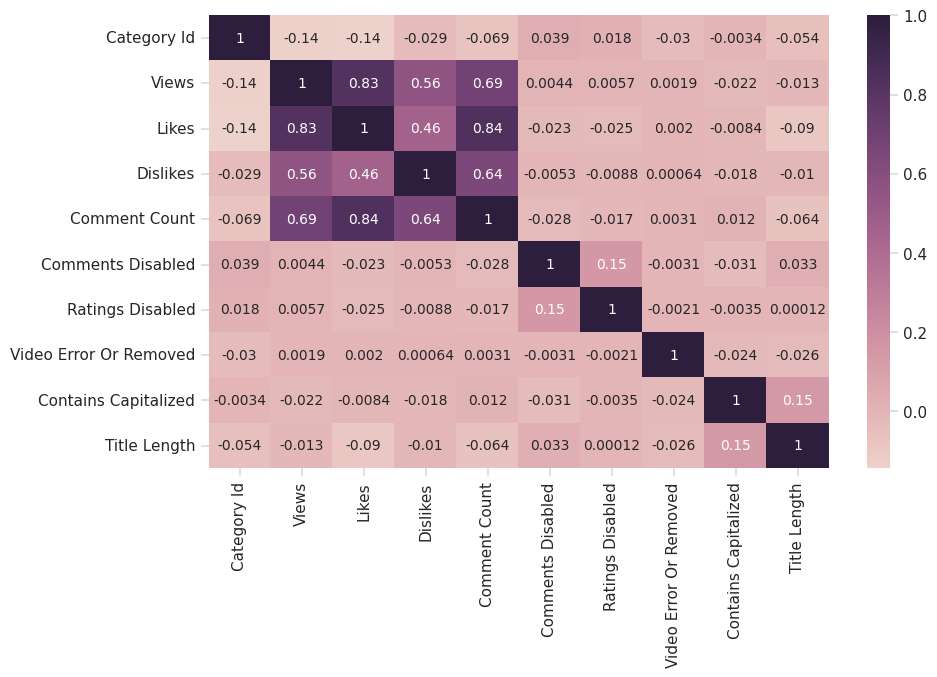

In [ ]:
# We see for example that views and likes are highly positively correlated with a correlation value of 0.85; 
# we see also a high positive correlation (0.80) between likes and comment count, and between dislikes and comment count (0.70).
# There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

# Now let's visualize the correlation table above using a heatmap

h_labels = [x.replace('_', ' ').title() for x in list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

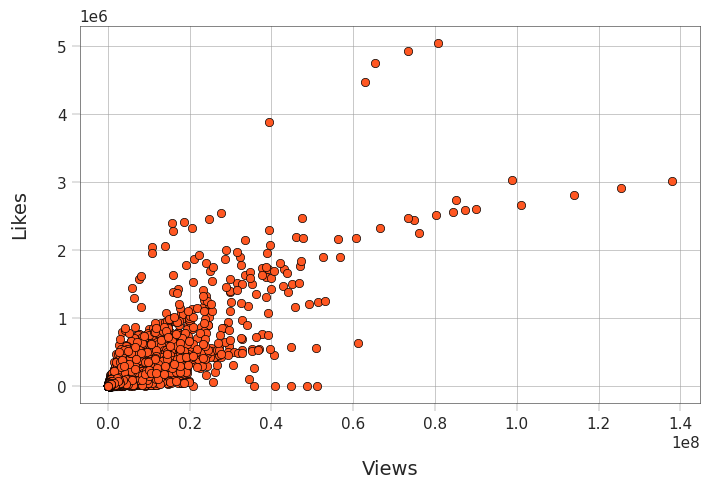

In [ ]:
# The correlation map and correlation table above say that views and likes are highly positively correlated. 
# Verifcation by scatterplot:

fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

In [ ]:
# MOST COMMON WORDS IN VIDEO TITLES

title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]     #nested loop
Counter(title_words).most_common(25)

[('-', 12666),
 ('|', 12596),
 ('The', 5167),
 ('2018', 3765),
 ('the', 2498),
 ('Episode', 2298),
 ('&', 2286),
 ('to', 1903),
 ('in', 1797),
 ('of', 1774),
 ('and', 1699),
 ('A', 1522),
 ('on', 1383),
 ('To', 1316),
 ('a', 1279),
 ('2017', 1202),
 ('with', 1200),
 ('vs', 1177),
 ('Game', 1094),
 ('Full', 1056),
 ('2', 1030),
 ('Trump', 962),
 ('I', 938),
 ('In', 930),
 ('Official', 930)]

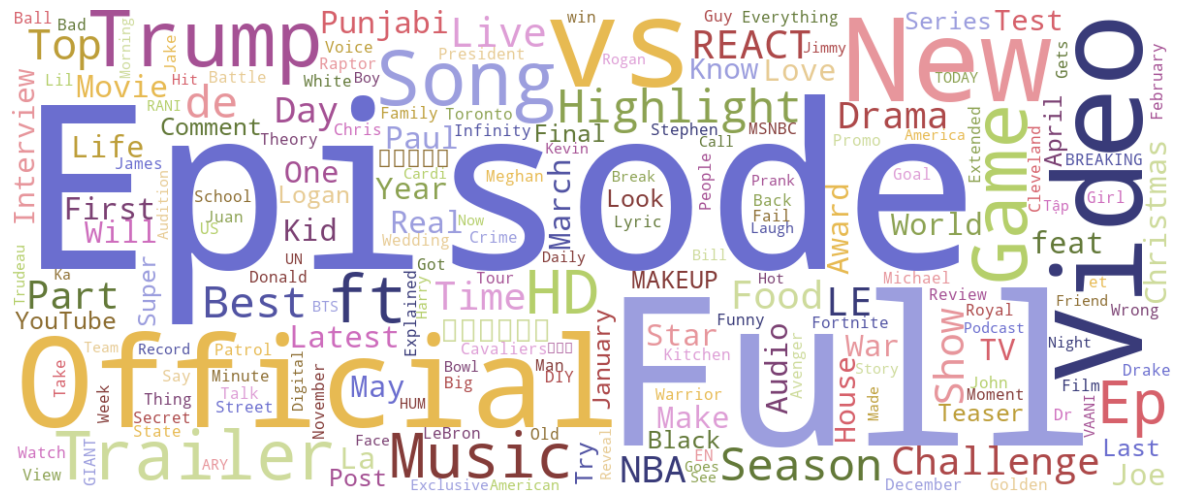

In [ ]:
# Let's draw a WORD CLOUD FOR THE TITLES of our trending videos, which is a way to visualize most common words in the titles; 
# the more common the word is, the bigger its font size is.

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

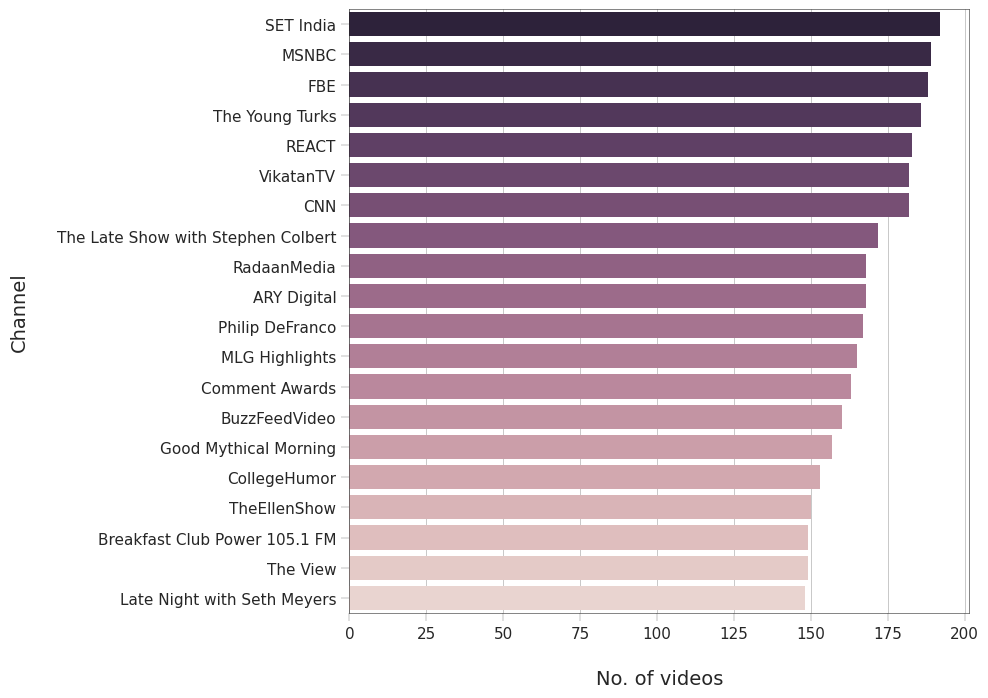

In [ ]:
# Which CHANNELS have the largest number of trending videos?

cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
      .sort_values("video_count", ascending=False).head(20)

_, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

Entertainment           13451
News & Politics          4159
People & Blogs           4105
Comedy                   3773
Music                    3731
Sports                   2787
Film & Animation         2060
Howto & Style            2007
Gaming                   1344
Science & Technology     1155
Education                 991
Travel & Events           392
Pets & Animals            369
Autos & Vehicles          353
Shows                     124
Movies                      6
Name: category_name, dtype: int64

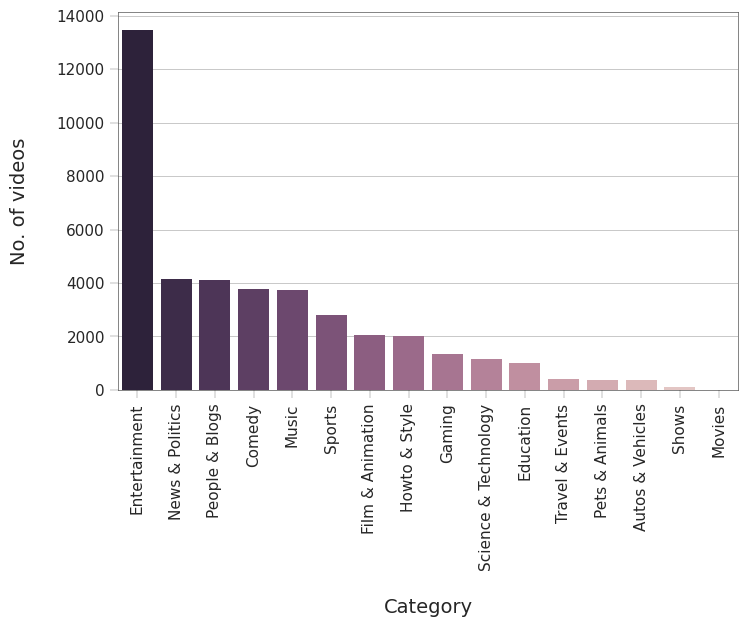

In [ ]:
# Which video CATEGORY has the largest number of trending videos?

with open("CA_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]

df['category_name'] = df['category_id'].map(cat_dict)

cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
_, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

df["category_name"].value_counts()

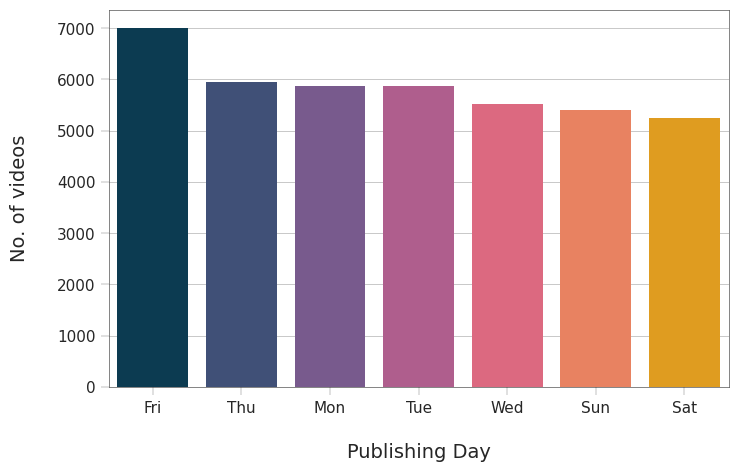

In [ ]:
# TRENDING VIDEOS AND THEIR PUBLISHING TIME

df["publishing_day"] = df["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

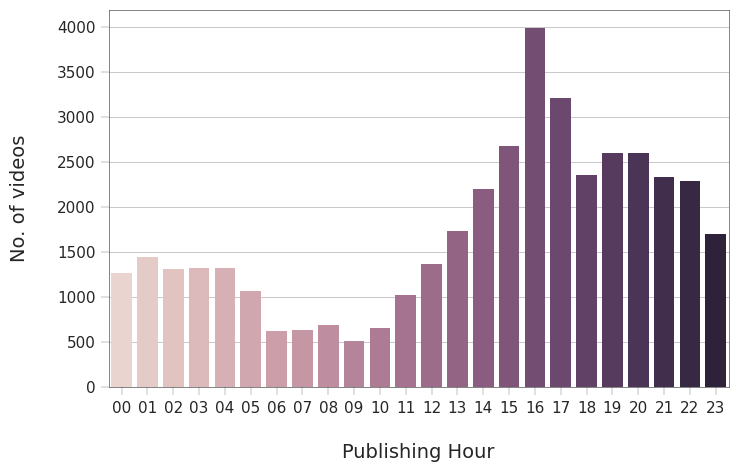

In [ ]:
# PUBLISHING HOUR

cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})\
        .sort_values('publishing_hour', ascending=True)

_, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

False    40854
True        27
Name: video_error_or_removed, dtype: int64

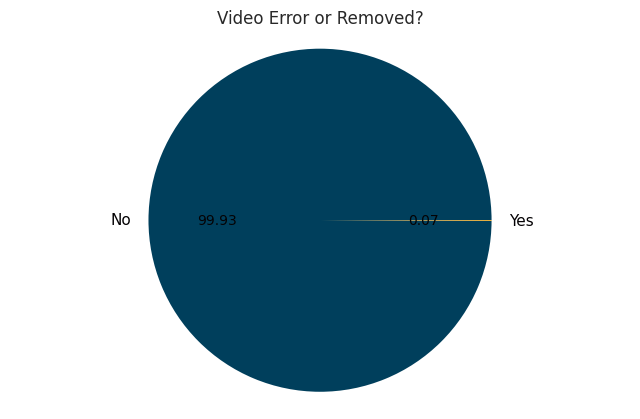

In [ ]:
# HOW MANY TRENDING VIDEOS HAVE AN ERROR?

value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], autopct='%.2f',
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

df["video_error_or_removed"].value_counts()

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

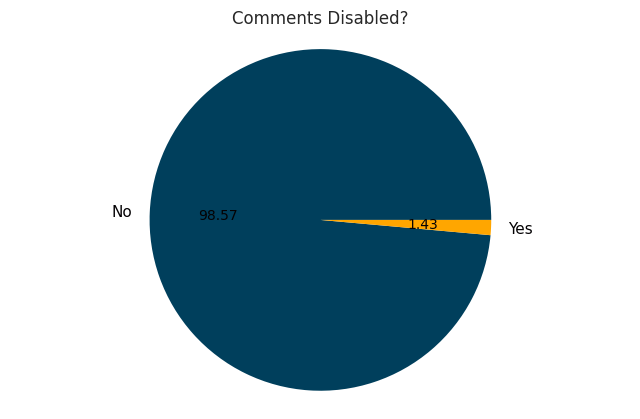

In [ ]:
# How many trending videos have their commets disabled?

value_counts = df["comments_disabled"].value_counts().to_dict()
_, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], autopct='%.2f',
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

df["comments_disabled"].value_counts(normalize=True)

False    40602
True       279
Name: ratings_disabled, dtype: int64

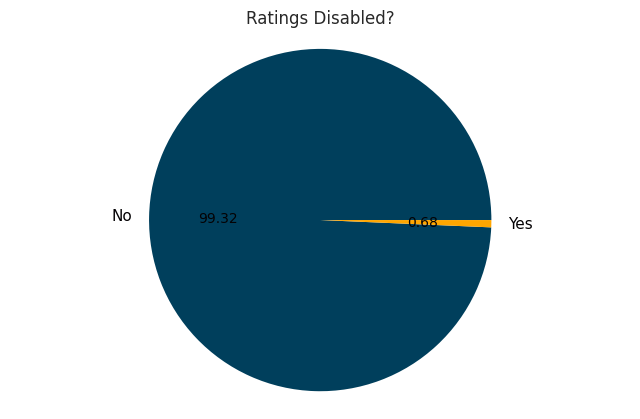

In [ ]:
# How many trending videos have their ratings disabled?

value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], autopct='%.2f',
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

df["ratings_disabled"].value_counts()

In [ ]:
# How many videos have both comments and ratings disabled?

len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

63

> ## **Conclusions**

Here are the some of the results we extracted from the analysis:

*   We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018. It contains 40881 video entry.

*   75% of trending videos have less than 1 million views, and 96% have less than 5 million views.

*   80% of trending videos have less than 40,000 likes, and 91% have less than 100,000 likes.

*   76% of trending videos have less than 4,000 comments, and 96% have less than 25,000 comments.

*   Some videos may appear on the trending videos list on more than one day. Our dataset contains 40881 entries but not for 40881 unique videos but for 24427 unique videos.

*   Almost every trending video that has 80,000,000 views and more has title length between 35 and 60 characters approximately.

*   The delimiters - and | were common in trending video titles.

*   The words '2018', 'Episode', 'Trailer', 'Game', 'Full' and 'Official' were common also in trending video titles.

*   There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.

*   There is a strong positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.

*   The category that has the largest number of trending videos is 'Entertainment' with 13,451 videos, followed by 'News & Politics' category with 4,159 videos, followed by 'People & Blogs' category with 4,105 videos.

*   On the opposite side, the category that has the smallest number of trending videos is 'Movies' with 6 videos, followed by 'Shows' with 124 videos, followed by 'Autos & Vehicles' with 353 videos.

*   The number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week. 

*   The time period between 2PM and 10PM, peaking between at 4PM, had the largest number of trending videos.